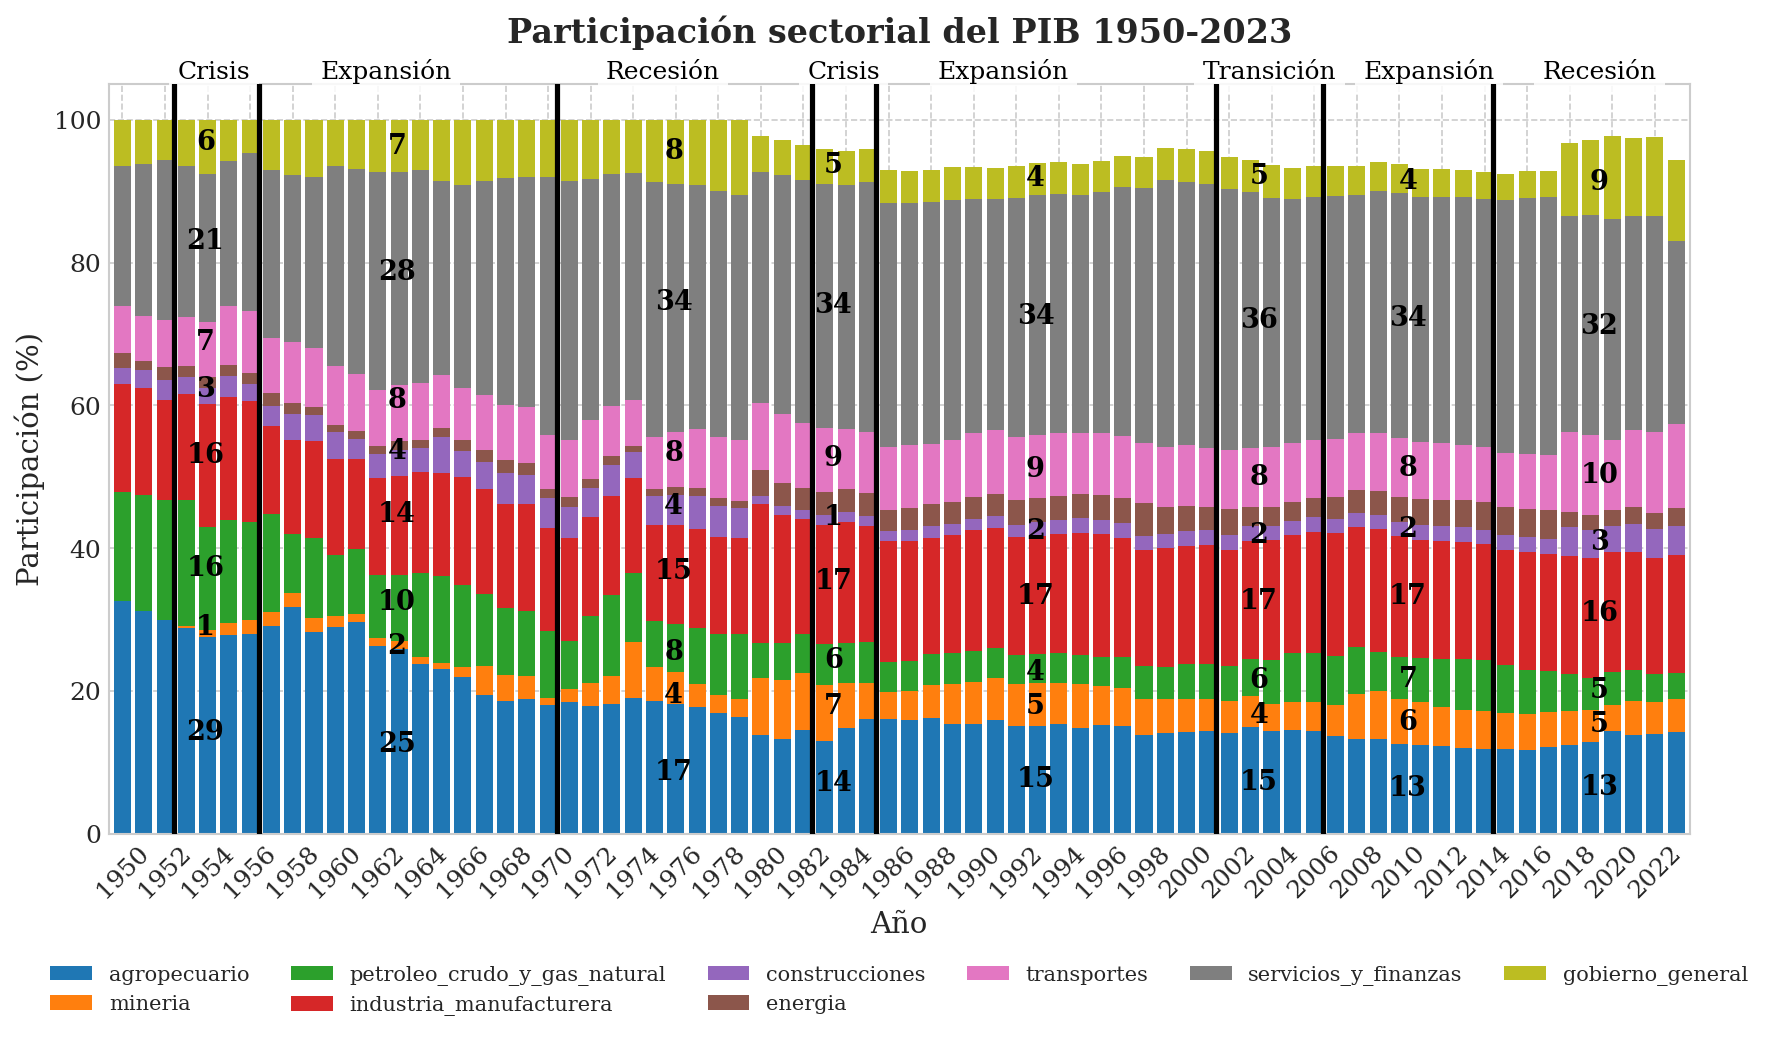

'../../../../assets/tesis/serie_completa/pib/participacion_pib_ramas.png'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3, os
import numpy as np 
import sys
sys.path.append(os.path.abspath('../'))
from config import *
from graficos_utils import *

OUTPUT_DIR = "../../../../assets/tesis/serie_completa/pib"
os.makedirs(OUTPUT_DIR, exist_ok=True)

set_style()

# ── 2. Carga de datos ────────────────────────────────────────────────────────
with sqlite3.connect("../../../../db/proyectomacro.db") as conn:
    df = pd.read_sql_query("SELECT * FROM participacion_pib_ramas", conn)

df.set_index("año", inplace=True)
df["servicios_y_finanzas"]=df["comercio_finanzas"] +df["servicios"]+df["propiedad_vivienda"]
df.drop(columns=["comercio_finanzas", "servicios", "propiedad_vivienda"], inplace=True)
cycles_adj=adjust_cycles(df, CYCLES)
# Columnas a graficar (excluimos minas_canteras_total)
cols = ['agropecuario',
 'mineria',
 'petroleo_crudo_y_gas_natural',
 'industria_manufacturera',
 'construcciones',
 'energia',
 'transportes',
 'servicios_y_finanzas',
 'gobierno_general',]
pct = df[cols]

cycle_stats = {
    name: pct.loc[sl, cols].mean().to_dict()
    for name, sl in cycles_adj.items()
}
#offset
hitos_offset = {
    1952: (0, 1),
    1956: (0, 1),
    1970: (0, 1),
    1982: (0, 1),
    1985: (0, 1),
    2001: (0, 1),
    2006: (0, 1),
    2014: (0, 1)
}
hitos_text_x = {
    1952: 1.9,
    1956: 6,
    1970: 5,
    1982: 1.5,
    1985: 6,
    2001: 2.5,
    2006: 5,
    2014: 5
}

# ── 4. Gráfico stacked-bar ──────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(14, 7))
pct.plot(kind="bar", stacked=True, ax=ax, width=0.8)

ax.set_ylabel("Participación (%)")
ax.set_xlabel("Año")
ax.set_title("Participación sectorial del PIB 1950-2023",
             fontweight="bold", pad=20)

# muevo la leyenda fuera del área de gráfico, abajo
ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=6,            # ajusta según cuántos ítems tengas
    fontsize=10,
    frameon=False
)
fig.subplots_adjust(bottom=0.25)   # expande margen inferior

# construyo un array 0,1,2,… tan largo como df.index
positions = np.arange(len(df.index))
# uso solo cada segunda posición, y como etiqueta el año correspondiente
plt.xticks(positions[::2], df.index[::2], rotation=45)


fig.subplots_adjust(right=0.72)




add_hitos_barras(
    ax, df.index, hitos_v, hitos_offset, hitos_text_x
)








MEAN_OFFSETS_BY_NAME = {
    "Crisis 52-55":      {'consumo_publico': (0.0, 12.0)},
    "Expansión 56-69":   {'consumo_publico': (0.0, 14.5)},
    "Recesión 70-81":    {'consumo_publico': (0.0, 14.5)},
    "Crisis 82-85":      {'consumo_publico': (0.0, 12.0)},
    "Expansión 86-99":   {'consumo_publico': (0.0, 15.0)},
    "Crisis 00-05":      {'consumo_publico': (0.0, 12.0)},
    "Expansión 06-14": {'consumo_publico': (0.0, 12.0)},
    "Recesión 15-23":    {'consumo_publico': (0.0, 12.0)},
}
# 2️⃣  Componentes cuyos promedios NO quieres anotar
SKIP_MEANS_BY_NAME = {
    "Crisis 52-55":      {'energia'},
    "Expansión 56-69":   {'energia'},
    "Recesión 70-81":    {'energia'},
    "Crisis 82-84":      {'energia'},
    "Expansión 85-00":   {'energia'},
    "Transicion 01-05":      {'energia'},
    "Expansión 06-14": {'energia'},
    "Recesión 15-23":    {'energia'},
}

add_cycle_means_barras(
    ax,
    index=list(df.index),          # secuencia de años
    cycle_slices=cycles_adj,       # nombre → slice
    cycle_stats=cycle_stats,       # nombre → {col: media}
    cols=cols,                     # orden de apilado
    offsets=MEAN_OFFSETS_BY_NAME,  # opcional
    skip=SKIP_MEANS_BY_NAME        # opcional
)


# ── 6. Guardar y mostrar ────────────────────────────────────────────────────
plt.tight_layout()
out_path = os.path.join(OUTPUT_DIR, "participacion_pib_ramas.png")
plt.savefig(out_path, dpi=300)
plt.show()

out_path


In [3]:
# import seaborn as sns
# df_means = pd.DataFrame({
#     #"Crisis 52–55":      avg_crisis_52_55,
#     "Expansión 56–68":   avg_expansion_56_69,
#     "Recesión 70–81":    avg_recesion_70_81,
#     #"Crisis 82–85":      avg_crisis_82_85,
#     "Expansión 86–99":   avg_expansion_86_99,
#     #"Crisis 00–05":      avg_crisis_00_05,
#     "Acumulación 06–13": avg_acumulacion_06_13,
#     "Recesión 14–23":    avg_recesion_14_23
# }).round(1)

# # ── 5. Gráfico seaborn (tabla en grises sobrio) ───────────────────────────────
# fig, ax = plt.subplots(figsize=(12, 6))
# sns.heatmap(
#     df_means,
#     annot=True, fmt=".1f",
#     cmap="Blues",
#     cbar=False,
#     linewidths=0.5,
#     linecolor="lightgray",
#     ax=ax
# )

# ax.set_title(
#     "Promedios de participación sectorial del PIB\npor ciclo económico (1952–2023)",
#     fontweight='bold', pad=20
# )
# ax.set_ylabel("Rama de actividad")
# ax.set_xlabel("Periodo económico")
# ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# plt.tight_layout()
# out_file = os.path.join(OUTPUT_DIR, "tabla_promedios_ciclos_seaborn.png")
# fig.savefig(out_file)
# plt.show()

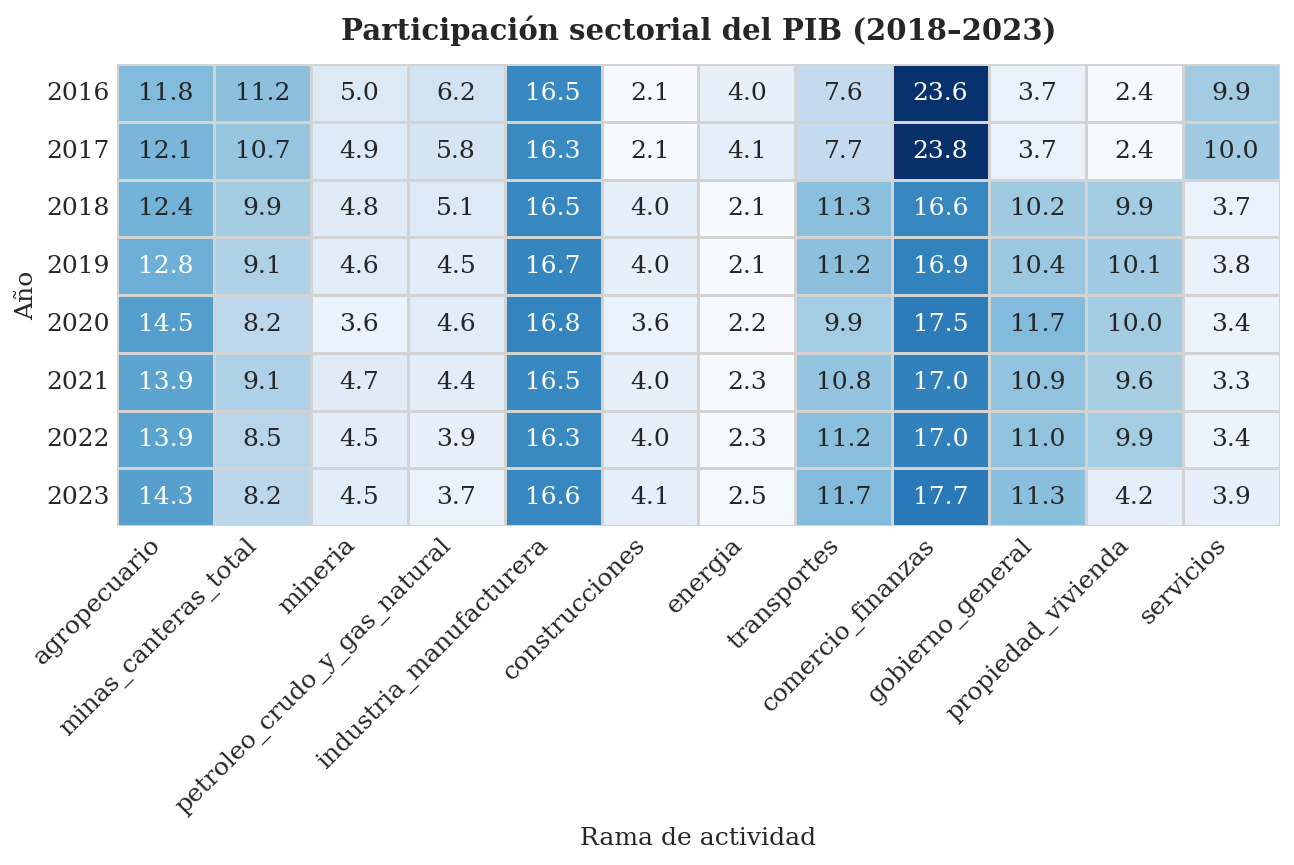

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import os

# ── Parámetros ────────────────────────────────────────────────────────────────
OUTPUT_DIR = "./figuras"
os.makedirs(OUTPUT_DIR, exist_ok=True)
YEARS = slice(2016, 2024)  # 2018–2023 inclusive

# ── Estilo ────────────────────────────────────────────────────────────────────
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "grid.linestyle": "--",
    "lines.linewidth": 2,
    "figure.dpi": 150,
    "savefig.bbox": "tight"
})

# ── Carga y filtrado ──────────────────────────────────────────────────────────
with sqlite3.connect("../../../../db/proyectomacro.db") as conn:
    df = pd.read_sql_query("SELECT * FROM participacion_pib_ramas", conn, index_col="año")

# Seleccionar años 2018–2023
df_subset = df.loc[YEARS]

# ── Gráfica con seaborn ───────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(
    df_subset,
    annot=True,
    fmt=".1f",
    cmap="Blues",
    cbar=False,
    linewidths=0.5,
    linecolor="lightgray",
    ax=ax
)

ax.set_title("Participación sectorial del PIB (2018–2023)", fontweight="bold", pad=12)
ax.set_ylabel("Año")
ax.set_xlabel("Rama de actividad")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# ── Guardar imagen ───────────────────────────────────────────────────────────

plt.show()



In [5]:
df

,agropecuario,minas_canteras_total,mineria,petroleo_crudo_y_gas_natural,industria_manufacturera,construcciones,energia,transportes,comercio_finanzas,gobierno_general,propiedad_vivienda,servicios
año,,,,,,,,,,,,
1950,32.61,15.22,0.00,15.22,15.22,2.17,2.17,6.52,10.87,6.52,2.17,6.52
1951,31.25,16.25,0.00,16.25,15.00,2.50,1.25,6.25,13.75,6.25,2.50,5.00
1952,29.91,16.82,0.00,16.82,14.02,2.80,1.87,6.54,14.02,5.61,2.80,5.61
1953,28.87,17.86,0.30,17.56,14.88,2.38,1.49,6.85,12.20,6.55,3.27,5.65
1954,27.55,15.38,1.07,14.31,17.20,2.28,1.52,7.76,12.48,7.61,3.35,4.87
...,...,...,...,...,...,...,...,...,...,...,...,...
2019,12.82,9.07,4.59,4.48,16.69,4.03,2.11,11.19,16.93,10.41,10.08,3.76
2020,14.48,8.18,3.59,4.59,16.83,3.57,2.23,9.88,17.49,11.68,9.96,3.41
2021,13.90,9.10,4.66,4.44,16.48,3.97,2.26,10.82,17.01,10.95,9.62,3.33
